In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tooth-decay-datasetraw/teeth_dataset/test/no-caries/nc9.jpg
/kaggle/input/tooth-decay-datasetraw/teeth_dataset/test/no-caries/nc10.jpg
/kaggle/input/tooth-decay-datasetraw/teeth_dataset/test/no-caries/nc1.jpg
/kaggle/input/tooth-decay-datasetraw/teeth_dataset/test/no-caries/nc2.jpg
/kaggle/input/tooth-decay-datasetraw/teeth_dataset/test/caries/208.jpg
/kaggle/input/tooth-decay-datasetraw/teeth_dataset/test/caries/212.jpg
/kaggle/input/tooth-decay-datasetraw/teeth_dataset/test/caries/215.jpg
/kaggle/input/tooth-decay-datasetraw/teeth_dataset/test/caries/202.jpg
/kaggle/input/tooth-decay-datasetraw/teeth_dataset/test/caries/wc2.jpg
/kaggle/input/tooth-decay-datasetraw/teeth_dataset/test/caries/wc45.jpg
/kaggle/input/tooth-decay-datasetraw/teeth_dataset/test/caries/wc50.jpg
/kaggle/input/tooth-decay-datasetraw/teeth_dataset/test/caries/211.jpg
/kaggle/input/tooth-decay-datasetraw/teeth_dataset/test/caries/wc44.jpg
/kaggle/input/tooth-decay-datasetraw/teeth_dataset/test/carie

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2

In [3]:
x = []
y = []

image_size = 224

labels = ['caries','without_caries']

for i in labels:
    
    folderPath = os.path.join('/kaggle/input/tooth-decay-datasetraw/teeth_dataset/Trianing',i)

    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        x.append(img)
        if(i=='caries'):
            y.append(1)
        else:
            y.append(0)
        
labels = ['caries','no-caries']
for i in labels:
    folderPath = os.path.join('/kaggle/input/tooth-decay-datasetraw/teeth_dataset/test',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        x.append(img)
        if(i=='caries'):
            y.append(1)
        else:
            y.append(0)

x = np.array(x)
y = np.array(y)

In [4]:
len(x)

288

In [5]:
x[0]

array([[[155, 100, 179],
        [153, 100, 175],
        [150,  99, 168],
        ...,
        [219, 180, 212],
        [200, 161, 194],
        [189, 149, 184]],

       [[155,  99, 180],
        [153,  99, 176],
        [150,  98, 169],
        ...,
        [209, 170, 203],
        [207, 167, 201],
        [205, 165, 201]],

       [[148,  94, 176],
        [149,  95, 174],
        [151,  99, 172],
        ...,
        [204, 165, 197],
        [213, 173, 206],
        [218, 179, 212]],

       ...,

       [[141, 156, 170],
        [143, 157, 170],
        [146, 159, 172],
        ...,
        [164, 170, 189],
        [164, 170, 189],
        [164, 170, 189]],

       [[133, 153, 169],
        [135, 154, 169],
        [138, 156, 170],
        ...,
        [168, 173, 192],
        [168, 174, 193],
        [169, 174, 193]],

       [[132, 155, 171],
        [134, 156, 172],
        [136, 157, 174],
        ...,
        [172, 176, 195],
        [172, 177, 196],
        [173, 177, 196]]

In [6]:
y[0]

1

In [7]:
x.shape

(288, 224, 224, 3)

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.85)

In [9]:
y_test

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

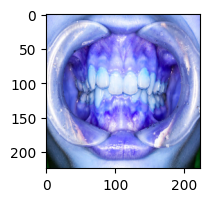

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize = (15,2))
plt.imshow(x_train[1])

In [11]:
classes = ['no-cavity','cavity']

In [12]:
def plot_sample(x,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

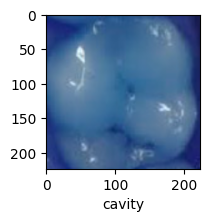

In [13]:
plot_sample(x_train,y_train,24)

In [14]:
y_train[35]

1

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

2024-05-23 08:01:31.700438: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-23 08:01:31.700538: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-23 08:01:31.859715: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [16]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=30,
      width_shift_range=0.3,
      height_shift_range=0.3,
      horizontal_flip=True,
      fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1./255)

train_ds= train_datagen.flow(
        x_train, y_train, batch_size=32,
)

validation_ds = validation_datagen.flow(
        x_test, y_test, batch_size=32,)

In [17]:
len(train_ds)

8

In [18]:
len(validation_ds)

2

In [19]:
import keras
import tensorflow as tf
from tensorflow.keras import layers,models
from keras.applications.xception import Xception

In [36]:
xception = Xception(
    include_top=False,
    weights="imagenet",
    input_shape=(224,224,3),
    classifier_activation="sigmoid",
)

model3 = models.Sequential([
    
    ## xception
    xception,
    
    layers.Flatten(),
    layers.Dense(1000, activation='relu'),
    layers.Dense(500, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model3.compile(optimizer= 'adamW',
           loss='binary_crossentropy',
           metrics=['accuracy'])

In [37]:
history3 = model3.fit(train_ds, validation_data=validation_ds, epochs=10)

Epoch 1/10


W0000 00:00:1716451787.654767     107 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


7/8 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step - accuracy: 0.8213 - loss: 1.0584

W0000 00:00:1716451806.994718     108 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8303 - loss: 1.0407   

W0000 00:00:1716451810.167710     109 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


8/8 ━━━━━━━━━━━━━━━━━━━━ 73s 3s/step - accuracy: 0.8373 - loss: 1.0270 - val_accuracy: 0.9545 - val_loss: 1.8166
Epoch 2/10


W0000 00:00:1716451811.822281     109 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 443ms/step - accuracy: 0.9274 - loss: 0.1628 - val_accuracy: 0.9545 - val_loss: 1.2471
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 444ms/step - accuracy: 0.9171 - loss: 0.1321 - val_accuracy: 0.9545 - val_loss: 0.5854
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 452ms/step - accuracy: 0.9310 - loss: 0.0973 - val_accuracy: 0.9545 - val_loss: 0.3577
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 455ms/step - accuracy: 0.9204 - loss: 0.2603 - val_accuracy: 0.9545 - val_loss: 0.1089
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 473ms/step - accuracy: 0.9372 - loss: 0.0803 - val_accuracy: 0.9545 - val_loss: 0.1498
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 453ms/step - accuracy: 0.9367 - loss: 0.0754 - val_accuracy: 0.9545 - val_loss: 0.0704
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 452ms/step - accuracy: 0.9364 - loss: 0.0574 - val_accuracy: 0.9545 - val_loss: 0.0519
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 451ms/step - accuracy: 0.9141 - loss: 0.1744 - val_accuracy: 0.9545 - val_loss: 0.1019
Epo

In [22]:
model3.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ xception (Functional)           │ (None, 7, 7, 2048)     │    20,861,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1000)           │   100,353,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 500)            │       500,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           501 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 365,037,389 (1.36 GB)

 Trainable params: 121,660,953 (464.10 MB)

 Non-trainable params: 54,528 (213.00 KB)

 Optimizer params: 243,321,908 (928.20 MB)

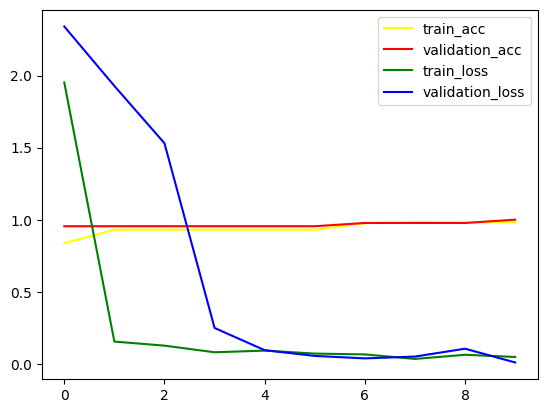

In [23]:
plt.plot(history3.history['accuracy'], color='yellow', label='train_acc')
plt.plot(history3.history['val_accuracy'], color='red', label='validation_acc')
plt.plot(history3.history['loss'], color='green', label='train_loss')
plt.plot(history3.history['val_loss'], color='blue', label='validation_loss')
plt.legend()

In [24]:
def convert_into_categorical(y):
    length=len(y)
    for i in range(length):
        y = y.astype(int)
    return y

In [25]:
y_pred = model3.predict(x_test)
y_pred=convert_into_categorical(y_pred)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

1/2 ━━━━━━━━━━━━━━━━━━━━ 2s 3s/step

W0000 00:00:1716451503.763639     108 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 3s/step


W0000 00:00:1716451506.618492     109 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


array([[ 0,  2],
       [ 0, 42]])

Text(70.72222222222221, 0.5, 'Actual')

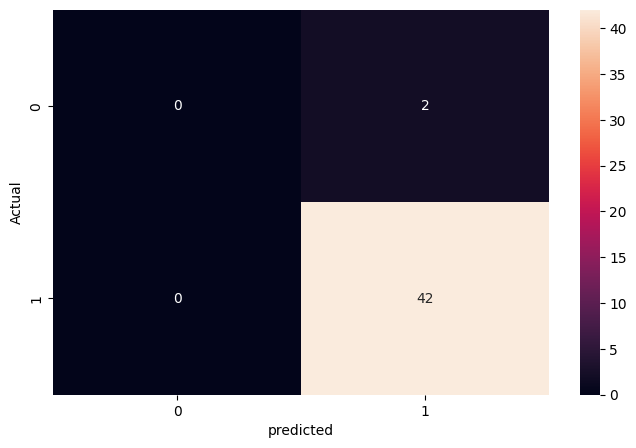

In [26]:
import seaborn as sb
plt.figure(figsize=(8,5))
sb.heatmap(cm, annot=True)
plt.xlabel('predicted')
plt.ylabel('Actual')

In [27]:
from sklearn.metrics import classification_report

In [28]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.95      1.00      0.98        42

    accuracy                           0.95        44
   macro avg       0.48      0.50      0.49        44
weighted avg       0.91      0.95      0.93        44



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [29]:
from sklearn.metrics import roc_curve

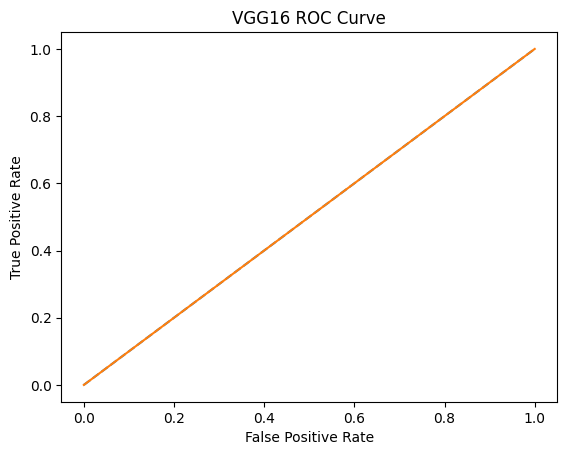

In [30]:
fpr, tpr, thresolds = roc_curve(y_test, y_pred)

plt.plot([0,1], [0,1], '--')
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('VGG16 ROC Curve')
plt.show()

predicted: cavity


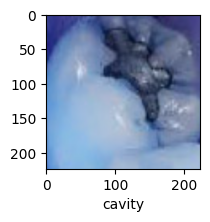

In [31]:
plot_sample(x_test, y_test, 1)
print("predicted:" ,classes[y_pred[1][0]])

predicted: cavity


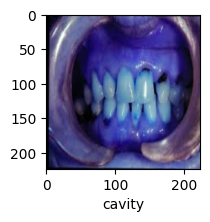

In [32]:
plot_sample(x_test, y_test, 12)
print("predicted:" ,classes[y_pred[12][0]])

In [33]:
model3.evaluate(x_test, y_test)

1/2 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.9375 - loss: 899.3909

W0000 00:00:1716451510.886440     107 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.9489 - loss: 735.8653


W0000 00:00:1716451512.773406     109 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


[654.1024780273438, 0.9545454382896423]